In [35]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import sys
import datetime
import backtrader as bt
import backtrader.analyzers as btanalyzers

class CommInfoFractional(bt.CommissionInfo):
    def getsize(self, price, cash):
        '''Returns fractional size for cash operation @price'''
        return self.p.leverage * (cash / price)

### Buy and HODL
class BaselineStrategy(bt.Strategy):
    
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            cash = self.broker.get_cash()
            limit_price = self.data.close[0] * 1.01
            size = (cash * 0.95) / limit_price
            print(cash, self.data.close[0], limit_price, size)
            self.buy(exectype=bt.Order.Limit, size=size)

cerebro = bt.Cerebro()

from_date=datetime.datetime(2016, 1, 1)
to_date = datetime.datetime(2020, 12, 30)

# Create data feeds
data_ticks = bt.feeds.CCXT(exchange='coinbasepro', symbol='BTC/USD', name="btc_usd_tick",
                           timeframe=bt.TimeFrame.Days, compression=1, fromdate=from_date, todate=to_date)
cerebro.adddata(data_ticks)

cerebro.broker.setcash(10000.0)
cerebro.broker.addcommissioninfo(CommInfoFractional())
cerebro.broker.setcommission(commission=0.005, margin=False, mult=1.0, commtype=None, percabs=True, stocklike=False, interest=0.0, interest_long=False, leverage=1.0, automargin=False, name=None)

cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
cerebro.addanalyzer(btanalyzers.AnnualReturn, _name='annualreturn')
cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(btanalyzers.Returns, _name='returns')
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name='tradeanalyzer')

cerebro.addobserver(bt.observers.DrawDown)
# cerebro.addobserver(bt.observers.LogReturns)
# cerebro.addobserver(bt.observers.TimeReturn)

# Add the strategy
cerebro.addstrategy(BaselineStrategy)

# Run the strategy
strats = cerebro.run()

2016-01-01, Close, 435.66
10000.0 435.66 440.01660000000004 21.590094555523585
2016-01-02, BUY EXECUTED, 435.66
2016-01-02, Close, 435.40
2016-01-03, Close, 431.91
2016-01-04, Close, 433.85
2016-01-05, Close, 433.34
2016-01-06, Close, 430.87
2016-01-07, Close, 459.07
2016-01-08, Close, 454.44
2016-01-09, Close, 450.38
2016-01-10, Close, 449.99
2016-01-11, Close, 449.19
2016-01-12, Close, 434.01
2016-01-13, Close, 432.77
2016-01-14, Close, 430.03
2016-01-15, Close, 357.53
2016-01-16, Close, 388.70
2016-01-17, Close, 378.46
2016-01-18, Close, 384.89
2016-01-19, Close, 375.27
2016-01-20, Close, 418.54
2016-01-21, Close, 409.38
2016-01-22, Close, 382.90
2016-01-23, Close, 387.50
2016-01-24, Close, 403.05
2016-01-25, Close, 391.40
2016-01-26, Close, 391.54
2016-01-27, Close, 394.79
2016-01-28, Close, 379.61
2016-01-29, Close, 378.68
2016-01-30, Close, 378.46
2016-01-31, Close, 367.95
2016-02-01, Close, 371.33
2016-02-02, Close, 372.93
2016-02-03, Close, 368.87
2016-02-04, Close, 387.99
2016

2016-12-04, Close, 767.99
2016-12-05, Close, 752.00
2016-12-06, Close, 759.80
2016-12-07, Close, 764.34
2016-12-08, Close, 767.89
2016-12-09, Close, 773.22
2016-12-10, Close, 775.87
2016-12-11, Close, 771.05
2016-12-12, Close, 778.94
2016-12-13, Close, 776.18
2016-12-14, Close, 777.66
2016-12-15, Close, 776.16
2016-12-16, Close, 780.98
2016-12-17, Close, 788.57
2016-12-18, Close, 790.72
2016-12-19, Close, 790.81
2016-12-20, Close, 798.99
2016-12-21, Close, 834.50
2016-12-22, Close, 856.02
2016-12-23, Close, 917.26
2016-12-24, Close, 891.50
2016-12-25, Close, 896.12
2016-12-26, Close, 902.09
2016-12-27, Close, 925.20
2016-12-28, Close, 982.17
2016-12-29, Close, 970.72
2016-12-30, Close, 960.81
2016-12-31, Close, 973.37
2017-01-01, Close, 992.95
2017-01-02, Close, 1011.45
2017-01-03, Close, 1020.67
2017-01-04, Close, 1130.30
2017-01-05, Close, 1007.00
2017-01-06, Close, 895.71
2017-01-07, Close, 909.00
2017-01-08, Close, 923.33
2017-01-09, Close, 902.66
2017-01-10, Close, 907.00
2017-01-

2018-06-01, Close, 7514.32
2018-06-02, Close, 7636.42
2018-06-03, Close, 7706.37
2018-06-04, Close, 7487.37
2018-06-05, Close, 7612.51
2018-06-06, Close, 7655.00
2018-06-07, Close, 7684.93
2018-06-08, Close, 7618.80
2018-06-09, Close, 7496.40
2018-06-10, Close, 6770.31
2018-06-11, Close, 6881.00
2018-06-12, Close, 6545.00
2018-06-13, Close, 6302.31
2018-06-14, Close, 6638.49
2018-06-15, Close, 6391.22
2018-06-16, Close, 6484.29
2018-06-17, Close, 6447.16
2018-06-18, Close, 6709.02
2018-06-19, Close, 6736.41
2018-06-20, Close, 6759.18
2018-06-21, Close, 6719.01
2018-06-22, Close, 6059.82
2018-06-23, Close, 6178.29
2018-06-24, Close, 6149.99
2018-06-25, Close, 6246.01
2018-06-26, Close, 6074.00
2018-06-27, Close, 6132.17
2018-06-28, Close, 5851.66
2018-06-29, Close, 6202.36
2018-06-30, Close, 6383.19
2018-07-01, Close, 6349.50
2018-07-02, Close, 6611.79
2018-07-03, Close, 6502.62
2018-07-04, Close, 6587.47
2018-07-05, Close, 6532.95
2018-07-06, Close, 6600.00
2018-07-07, Close, 6753.28
2

2019-12-16, Close, 6877.03
2019-12-17, Close, 6616.62
2019-12-18, Close, 7285.53
2019-12-19, Close, 7149.12
2019-12-20, Close, 7190.00
2019-12-21, Close, 7143.01
2019-12-22, Close, 7513.06
2019-12-23, Close, 7310.79
2019-12-24, Close, 7255.01
2019-12-25, Close, 7192.12
2019-12-26, Close, 7194.13
2019-12-27, Close, 7245.83
2019-12-28, Close, 7302.67
2019-12-29, Close, 7384.89
2019-12-30, Close, 7218.00
2019-12-31, Close, 7165.72
2020-01-01, Close, 7174.33
2020-01-02, Close, 6945.02
2020-01-03, Close, 7334.45
2020-01-04, Close, 7348.63
2020-01-05, Close, 7355.40
2020-01-06, Close, 7764.63
2020-01-07, Close, 8158.52
2020-01-08, Close, 8045.51
2020-01-09, Close, 7813.78
2020-01-10, Close, 8198.09
2020-01-11, Close, 8020.00
2020-01-12, Close, 8180.81
2020-01-13, Close, 8104.50
2020-01-14, Close, 8815.69
2020-01-15, Close, 8808.81
2020-01-16, Close, 8714.76
2020-01-17, Close, 8899.42
2020-01-18, Close, 8909.32
2020-01-19, Close, 8697.53
2020-01-20, Close, 8628.89
2020-01-21, Close, 8722.03
2

OrderedDict([('rtot', 4.1342782581838255),
             ('ravg', 0.0022641173374500687),
             ('rnorm', 0.7692532573048794),
             ('rnorm100', 76.92532573048794)])
Returns: None
OrderedDict([('sharperatio', 0.7075709507425372)])
Sharpe Ratio: None
OrderedDict([(2016, 1.156218004048029),
             (2017, 12.906447153096254),
             (2018, -0.7323536823676501),
             (2019, 0.9345374851152528),
             (2020, 3.0220452700108593)])
Annual Return: None
AutoOrderedDict([('len', 0),
                 ('drawdown', 0.0),
                 ('moneydown', 0.0),
                 ('max',
                  AutoOrderedDict([('len', 1079),
                                   ('drawdown', 83.69361893711935),
                                   ('moneydown', 355524.3029467524)]))])
Drawdown: None
AutoOrderedDict([('total', AutoOrderedDict([('total', 1), ('open', 1)]))])
Trade Analyzer: None


<IPython.core.display.Javascript object>


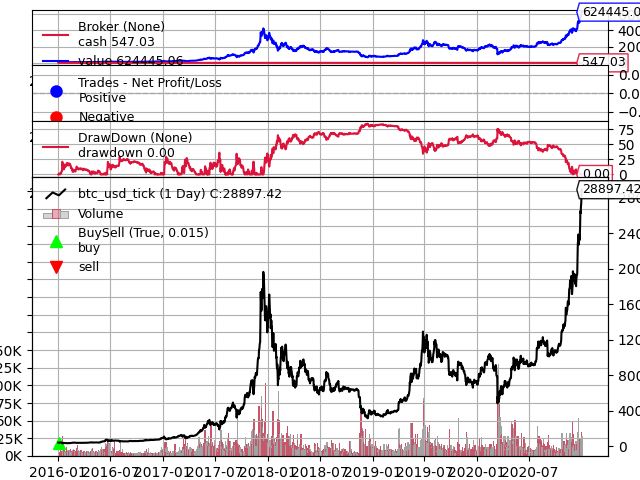

[[<Figure size 640x480 with 5 Axes>]]

In [29]:
print('Returns:', strats[0].analyzers.returns.pprint())
print('Sharpe Ratio:', strats[0].analyzers.mysharpe.pprint())
print('Annual Return:', strats[0].analyzers.annualreturn.pprint())
print('Drawdown:', strats[0].analyzers.drawdown.pprint())
print('Trade Analyzer:', strats[0].analyzers.tradeanalyzer.pprint())
cerebro.plot()